## Investigation On Intervals and Determine whether it's meal

In [1]:
import sys
sys.path.insert(0, '../scripts')

import numpy as np
import intervals as invs
import warnings
from path import fr1_ctrl_path, fr1_cask_path, fr1_ctrl_sheets, fr1_cask_sheets

warnings.filterwarnings('ignore')
alpha = 0.1
import meals as ml
import tools as tl
import intervals as invs
from accuracy import graph_group_stats
from preprocessing import read_excel_by_sheet

## Control Group

In [2]:
ctrl_avg_pellet = [] # pellet per hour
ctrl_dark_meals = [] # percentage of meals in inactive/dark phase
ctrl_fir_meal = []
ctrl_fir_good_meal = []
flip_ctrl_meal_count = []

for sheet in fr1_ctrl_sheets[:]:
    data = read_excel_by_sheet(sheet=sheet, parent=fr1_ctrl_path)
    meal,_ = ml.find_meals_paper(data, time_threshold=60, pellet_threshold=2)
    meal_with_acc, first_meal_time = ml.find_first_good_meal(data, 60, 2, 'lstm')
    meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 3600
    meal_1_good = (first_meal_time - data['Time'][0]).total_seconds() / 3600
    group = ml.pellet_flip(data)
    bhv, num = tl.get_bhv_num(sheet)
    flip_ctrl_meal_count.append(round(len(meal) / ml.experiment_duration(data), 2))
    ctrl_avg_pellet.append(ml.average_pellet(group))
    ctrl_dark_meals.append(ml.active_meal(meal))
    ctrl_fir_meal.append(meal_1)
    ctrl_fir_good_meal.append(meal_1_good)
    # ml.graph_pellet_frequency(group, bhv, num)
    # ml.graphing_cum_count(data, meal, bhv, num, flip=True)

## CASK Group

In [3]:
cask_avg_pellet = [] # pellet per hour
cask_dark_meals = [] # percentage of meals in inactive/dark phase
cask_fir_meal = []
cask_fir_good_meal = []
flip_cask_meal_count = []

for sheet in fr1_cask_sheets:
    data = read_excel_by_sheet(sheet=sheet, parent=fr1_cask_path)
    group = ml.pellet_flip(data)
    bhv, num = tl.get_bhv_num(sheet)
    meal,_ = ml.find_meals_paper(data, time_threshold=60, pellet_threshold=2)
    meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 3600
    meal_with_acc, first_meal_time = ml.find_first_good_meal(data, 60, 2, 'lstm')
    meal_1_good = (first_meal_time - data['Time'][0]).total_seconds() / 3600
    cask_fir_meal.append(meal_1)
    cask_fir_good_meal.append(meal_1_good)
    flip_cask_meal_count.append(round(len(meal) / ml.experiment_duration(data), 2))
    cask_avg_pellet.append(ml.average_pellet(group))
    cask_dark_meals.append(ml.active_meal(meal))

    # ml.graph_pellet_frequency(group, bhv, num)
    # ml.graphing_cum_count(data, meal, bhv, num, flip=True)

In [4]:
ctrl_light_meals = 1 - np.array(ctrl_dark_meals)
cask_light_meals = 1 - np.array(cask_dark_meals)

#### Inactive and active meal in group

In [5]:
invs.perform_T_test(ctrl_light_meals, ctrl_dark_meals)

P Value is  2.296142029696077e-22
There is a significant difference between the two groups.


In [6]:
invs.perform_T_test(cask_dark_meals, cask_light_meals)

P Value is  3.582730810336006e-25
There is a significant difference between the two groups.


#### Average Meal Count per Day

In [7]:
invs.perform_T_test(flip_ctrl_meal_count, flip_cask_meal_count, test_side='two-sided')

P Value is  0.6848973418110389
There is no significant difference between the two groups.


#### Inactive and active meal between group

In [8]:
invs.perform_T_test(ctrl_dark_meals, cask_dark_meals, test_side='two-sided')

P Value is  0.021726199978753434
There is a significant difference between the two groups.


### Average Pellet

Control Size: 35
CASK Size: 31
Control Average: 235.4617142857143
CASK Average: 251.29322580645166
Control Standard Deviation: 5.763670988439032
CASK Standard Deviation: 7.4746368279745745


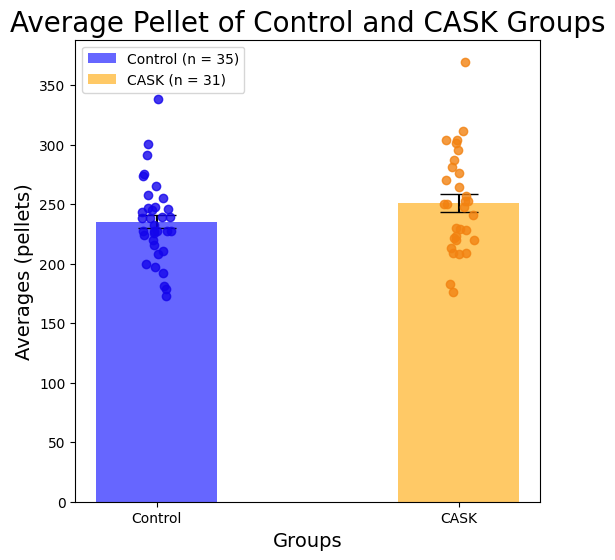

In [9]:
graph_group_stats(ctrl_avg_pellet, cask_avg_pellet, stats_name='Average Pellet', unit='pellets', group_names=['Control', 'CASK'])

In [10]:
invs.perform_T_test(ctrl_avg_pellet, cask_avg_pellet, test_side='two-sided')

P Value is  0.09950914475032482
There is no significant difference between the two groups.


#### Time needed to start the first meal

Control Size: 35
CASK Size: 31
Control Average: 1.5006761904682537
CASK Average: 1.9641774193458783
Control Standard Deviation: 0.1441885724034777
CASK Standard Deviation: 0.23583989222215263


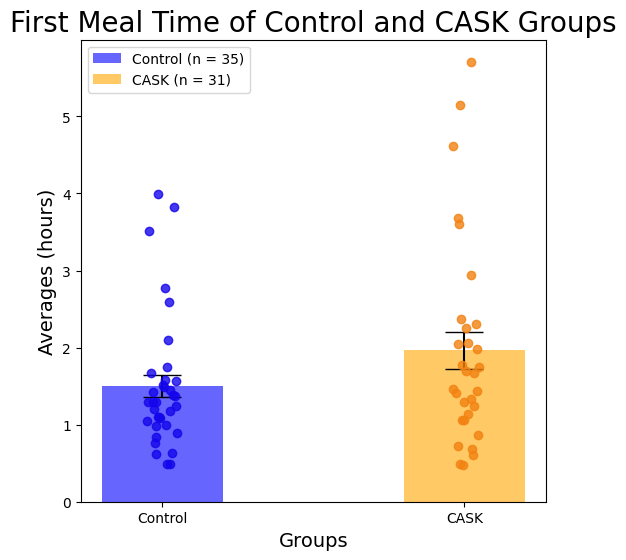

In [11]:
graph_group_stats(ctrl_fir_meal, cask_fir_meal, stats_name='First Meal Time', unit='hours',group_names=['Control', 'CASK'])

In [12]:
invs.perform_T_test(ctrl_fir_meal, cask_fir_meal, test_side='two-sided')

P Value is  0.09544152549416636
There is no significant difference between the two groups.


In [13]:
# ctrl_fir_good_meal.remove(max(ctrl_fir_good_meal))
# caskfir_good_meal.remove(max(cask_fir_good_meal))

Control Size: 35
CASK Size: 31
Control Average: 2.6299793650714283
CASK Average: 2.3047132616487453
Control Standard Deviation: 0.23935105714644858
CASK Standard Deviation: 0.23438720871072352


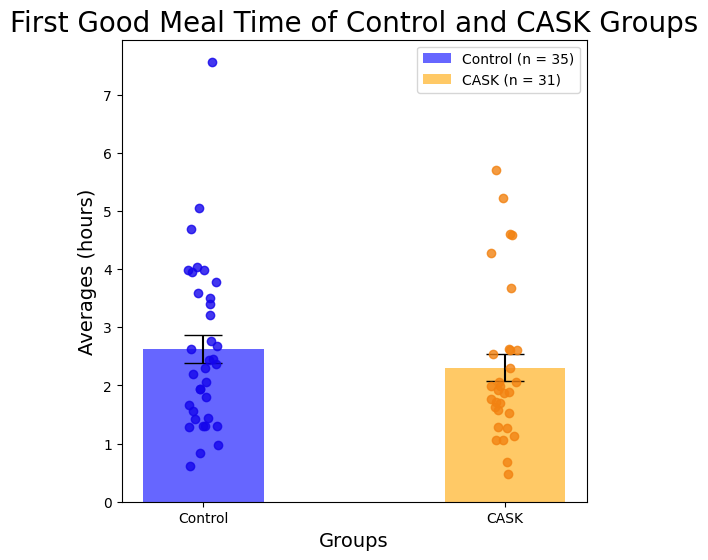

In [14]:
graph_group_stats(ctrl_fir_good_meal, cask_fir_good_meal, stats_name='First Good Meal Time', unit='hours', group_names=['Control', 'CASK'])

In [15]:
invs.perform_T_test(ctrl_fir_good_meal, cask_fir_good_meal, test_side='two-sided')

P Value is  0.3449780454656315
There is no significant difference between the two groups.
